In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Prettier plots
%config InlineBackend.figure_format = 'svg'

sns.set_context("notebook")
sns.set(style="ticks", font="Latin Modern Math")

In [3]:
datapath = "../datasett/fifa-20-complete-player-dataset/players_20.csv"
player_data_all = pd.read_csv(datapath)
player_data_all.sort_values('overall');

# Remove goalkeepers :(
player_data_without_gk = player_data_all[player_data_all.loc[:, 'player_positions'] != 'GK']
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
player_data = player_data_without_gk.select_dtypes(include=numerics)
player_data = player_data.dropna(axis='columns')
player_data.head();

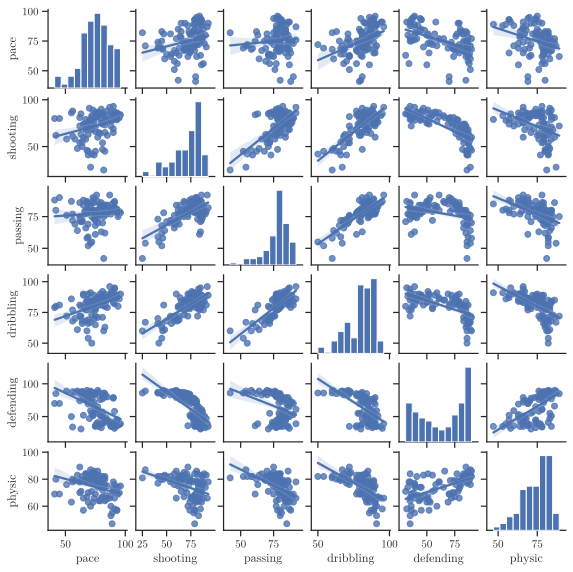

In [4]:
top_player_data = player_data.iloc[0:99, :]
sns.pairplot(top_player_data.loc[:, ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']], height=1.3, aspect=1, kind='reg')

In [5]:
player_data_std = (player_data-player_data.mean(axis=0))/player_data.std(axis=0,ddof=1)

In [6]:
pca = PCA()
pca.fit(player_data_std)
P=pca.components_
T = player_data_std.dot(P.T)

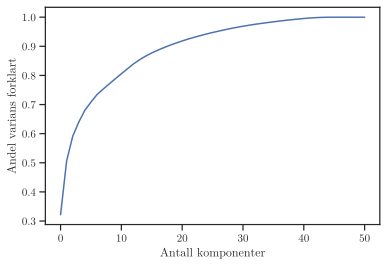

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Antall komponenter')
plt.ylabel('Andel varians forklart');

In [14]:
#print("First component ", P.T[:,0])

In [9]:
skills = player_data.columns
pc1 = P.T[:, 0]
# Sort skills descending by absolute value of score in first principal component
sorted_skills = [y for x, y in sorted(zip(abs(pc1), skills))]
sorted_skills.reverse()
sorted_skills;

In [10]:
import re
def find_player_position(pos):
    defender = re.match('.*B', pos)
    midfielder = re.match('.*M|.*W', pos)
    striker = re.match('ST|.*F|.*S', pos)
    if defender:
        return 'Forsvarsspiller'
    elif midfielder:
        return 'Midtbanespiller'
    elif striker:
        return 'Angrepsspiller'
    else:
        return 'ERROR'

Text(0, 0.5, 'Defensive fibre i kroppen')

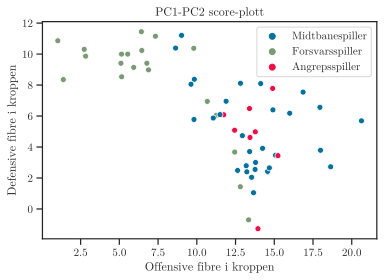

In [15]:
n_players = 70
t1 = T.loc[0:n_players-1, 0]
t2 = T.loc[0:n_players-1, 1]
player_pos = player_data_without_gk.loc[0:n_players-1, 'team_position']
player_positions = [find_player_position(x) for x in player_pos]

plt.close()
plt.figure(figsize=(6,4))
sns.scatterplot(x=t1, y=t2, hue=player_positions, palette=["#03719c", "#789b73", "#f10c45"])
plt.title('PC1-PC2 score-plott')
plt.xlabel('Offensive fibre i kroppen')
plt.ylabel('Defensive fibre i kroppen')

Text(0, 0.5, 'Defensive fibre i kroppen')

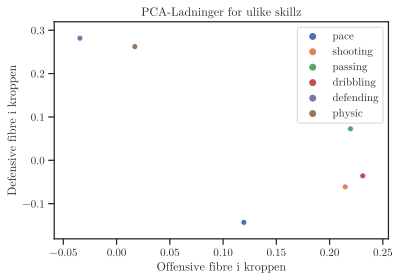

In [12]:
important_skillz = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
pc1 = P.T[:, 0]
pc2 = P.T[:, 1]
# Only plot skill summary
skill_selection = [x in important_skillz for x in player_data.columns.values]
pc1 = pc1[skill_selection]
pc2 = pc2[skill_selection]

plt.figure(figsize=(6,4))
sns.scatterplot(x=pc1, y=pc2, hue=important_skillz)
plt.title('PCA-Ladninger for ulike skillz')
plt.xlabel('Offensive fibre i kroppen')
plt.ylabel('Defensive fibre i kroppen')